In [ ]:
# Name: Lina Lau
# Date: March 20, 2023
# Title: Data analysis project - Explorative Data Analysis

In [ ]:
#from extract import extract
#import ORM_sample

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import plotly.express as px

In [2]:
salesData = pd.read_csv('D:\lina_lau\C339_datafundamentals\data_analysis_project\sales_data_sql.csv')
salesData.head(5)

,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber,productCode,quantityOrdered,priceEach,orderLineNumber,productName,buyPrice,MSRP,customerName,country,salesRepEmployeeNumber,creditLimit
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,NaN,363,S18_1749,30,136.00,3,1917 Grand Touring Sedan,86.70,170.00,Online Diecast Creations Co.,USA,1216,114200.0
1,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,NaN,363,S18_2248,50,55.09,2,1911 Ford Town Car,33.30,60.54,Online Diecast Creations Co.,USA,1216,114200.0
2,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,NaN,363,S18_4409,22,75.46,4,1932 Alfa Romeo 8C2300 Spider Sport,43.26,92.03,Online Diecast Creations Co.,USA,1216,114200.0
3,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,NaN,363,S24_3969,49,35.29,1,1936 Mercedes Benz 500k Roadster,21.75,41.03,Online Diecast Creations Co.,USA,1216,114200.0
4,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128,S18_2325,25,108.06,4,1932 Model A Ford J-Coupe,58.48,127.13,"Blauer See Auto, Co.",Germany,1504,59700.0


In [ ]:
# Obtaining brief information on salesData
salesData.info()

In [3]:
# Converting orderDate, requriedDate, and shippedDate to datetime format
salesData[['orderDate', 'requiredDate', 'shippedDate']] = salesData[['orderDate', 'requiredDate', 'shippedDate']].astype('datetime64')
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   orderNumber             1000 non-null   int64         
 1   orderDate               1000 non-null   datetime64[ns]
 2   requiredDate            1000 non-null   datetime64[ns]
 3   shippedDate             984 non-null    datetime64[ns]
 4   status                  1000 non-null   object        
 5   comments                222 non-null    object        
 6   customerNumber          1000 non-null   int64         
 7   productCode             1000 non-null   object        
 8   quantityOrdered         1000 non-null   int64         
 9   priceEach               1000 non-null   float64       
 10  orderLineNumber         1000 non-null   int64         
 11  productName             1000 non-null   object        
 12  buyPrice                1000 non-null   float64  

In [5]:
# Perform some calculations for new columns
# process_time = shippedDate - orderDate
salesData['processTime'] = salesData['shippedDate'] - salesData['orderDate']

# late_order = requiredDate - shippedDate 
salesData['lateOrder'] = salesData['requiredDate'] - salesData['shippedDate']

# itemPrice_total = quantityOrdered * priceEach
salesData['itemPrice_total'] = salesData['quantityOrdered'] * salesData['priceEach']

# profit = priceEach - buyPrice
salesData['profit'] = salesData['priceEach'] - salesData['buyPrice']

# customerProfit = MSRP - priceEach
salesData['customerProfit'] = salesData['MSRP'] - salesData['priceEach'] 

#salesData.head(5)



In [50]:
salesData.info()

salesData.to_csv(r'D:\lina_lau\C339_datafundamentals\data_analysis_project\salesData_trans.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   orderNumber             1000 non-null   int64          
 1   orderDate               1000 non-null   datetime64[ns] 
 2   requiredDate            1000 non-null   datetime64[ns] 
 3   shippedDate             984 non-null    datetime64[ns] 
 4   status                  1000 non-null   object         
 5   comments                222 non-null    object         
 6   customerNumber          1000 non-null   int64          
 7   productCode             1000 non-null   object         
 8   quantityOrdered         1000 non-null   int64          
 9   priceEach               1000 non-null   float64        
 10  orderLineNumber         1000 non-null   int64          
 11  productName             1000 non-null   object         
 12  buyPrice                1000 non-nu

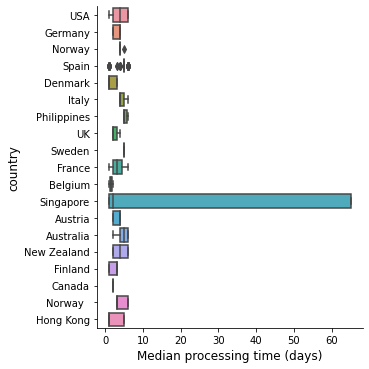

In [8]:
# Operations data analysis: 
# Median process time by country

processTime = sns.catplot(
    data = salesData, 
    x = salesData['processTime'].dt.days, 
    y = salesData['country'],
    kind = 'box'
)

processTime.set_axis_labels("Median processing time (days)", "country", fontsize = 12)

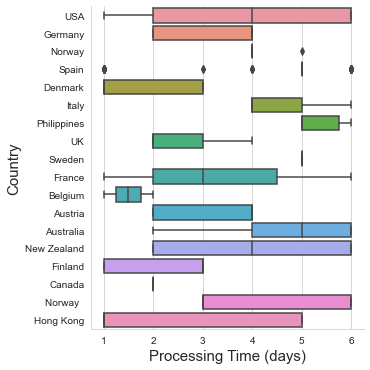

In [53]:

# Filtering out Singapore due to its longer processTime due to credit issues.
processTime_boxplot = sns.catplot(data = salesData[salesData['country'] != 'Singapore'], x = salesData['processTime'].dt.days, y = 'country', kind = 'box')

processTime_boxplot.set_axis_labels("Processing Time (days)","Country", fontsize = 15)


In [54]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   orderNumber             1000 non-null   int64          
 1   orderDate               1000 non-null   datetime64[ns] 
 2   requiredDate            1000 non-null   datetime64[ns] 
 3   shippedDate             984 non-null    datetime64[ns] 
 4   status                  1000 non-null   object         
 5   comments                222 non-null    object         
 6   customerNumber          1000 non-null   int64          
 7   productCode             1000 non-null   object         
 8   quantityOrdered         1000 non-null   int64          
 9   priceEach               1000 non-null   float64        
 10  orderLineNumber         1000 non-null   int64          
 11  productName             1000 non-null   object         
 12  buyPrice                1000 non-nu

In [49]:
# Finding the largest orders
orders = salesData[["orderNumber", "customerName", "country", "itemPrice_total"]]

orders.groupby(['orderNumber', 'customerName', 'country'])['itemPrice_total'].sum() # <- series object



orderNumber  customerName                  country    
10100        Online Diecast Creations Co.  USA            10223.83
10101        Blauer See Auto, Co.          Germany        10549.01
10102        Vitachrome Inc.               USA             5494.78
10103        Baane Mini Imports            Norway         50218.95
10104        Euro+ Shopping Channel        Spain          40206.20
                                                            ...   
10201        Mini Wheels Co.               USA            23923.93
10202        GiftsForHim.com               New Zealand    20220.04
10203        Euro+ Shopping Channel        Spain          40062.53
10204        Muscle Machine Inc            USA            58793.53
10205        Euro+ Shopping Channel        Spain          13059.16
Name: itemPrice_total, Length: 106, dtype: float64

In [39]:
singapore = salesData[salesData['country'] == "Singapore"]

singapore[singapore['processTime'].dt.days > 50]
print("Order number 10165 with 18 different products was delayed due to: ")
print(singapore['comments'].values[35])
print("")
print(singapore['comments'].values[21])



Order number 10165 with 18 different products was delayed due to: 
This order was on hold because customers's credit limit had been exceeded. Order will ship when payment is received

They want to reevaluate their terms agreement with Finance.


This order was on hold because customers's credit limit had been exceeded. Order will ship when payment is received


In [10]:
# Profit data analysis:
(salesData.groupby('country')['profit'].median()).sort_values()

country
New Zealand    25.975
Hong Kong      28.225
Belgium        28.475
Sweden         29.025
Norway         31.160
Spain          31.520
Italy          31.730
Finland        31.875
UK             32.125
Austria        32.530
USA            32.680
Australia      33.790
Philippines    34.235
Singapore      34.750
France         34.770
Denmark        35.440
Norway         36.780
Germany        38.300
Canada         42.545
Name: profit, dtype: float64

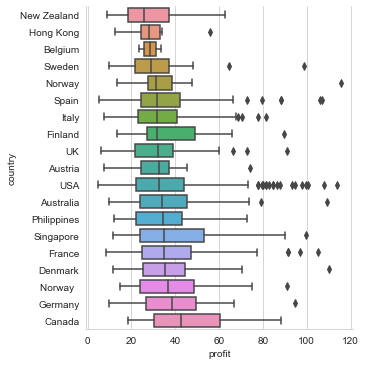

In [11]:
order_index = (salesData.groupby('country')['profit'].median()).sort_values().index

#sns.histplot(data = salesData, x = "customerProfit")
sns.set_style("whitegrid")
sns.catplot(data = salesData, x = 'profit', y = 'country', kind = 'box', order = order_index)


In [12]:
profit_boxplot = px.box(salesData, x = salesData['country'], y = salesData['profit'])
profit_boxplot.show()